In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
learning_curves = np.load('Results/DefaultExp/learning_curve.npz')
ROC_curves = np.load('Results/DefaultExp/ROC_curve.npz')

In [14]:
print(learning_curves['losses_train'], learning_curves['losses_val'])

[0.00284339 0.00265165 0.00247051 0.00249655 0.00254842 0.00222961
 0.00221642 0.00208088 0.00232882 0.00220446] [0.01043947 0.01044668 0.0104572  0.01045449 0.01043059 0.01038905
 0.01034603 0.01029818 0.01024495 0.01019463]


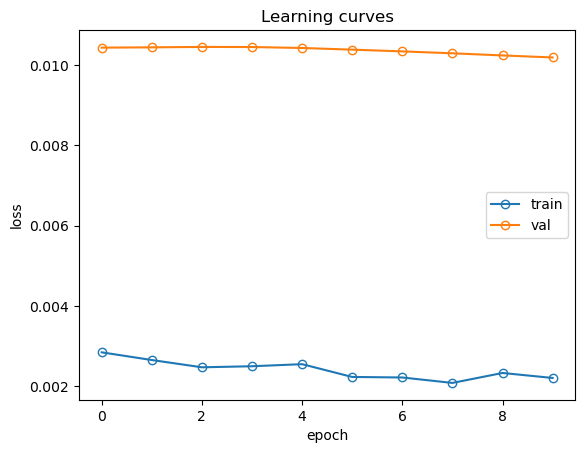

In [15]:
fig = plt.figure()

plt.plot(learning_curves['losses_train'], label='train', marker='o', fillstyle='none')
plt.plot(learning_curves['losses_val'], label='val', marker = "o", fillstyle = "none")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curves')
plt.legend()
plt.show()

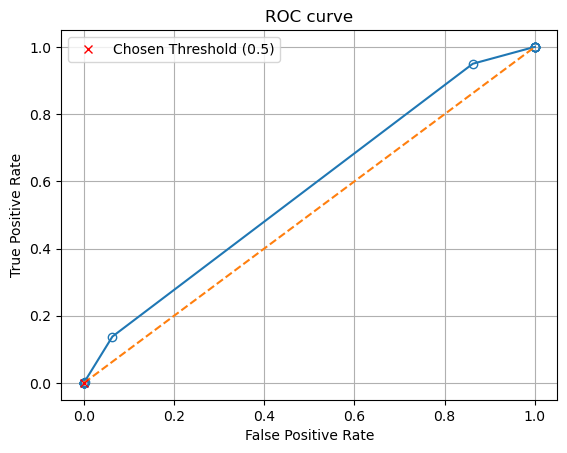

In [16]:
fig = plt.figure()

plt.plot(ROC_curves['FPR'], ROC_curves['TPR'], marker='o', fillstyle='none')
plt.plot([0,1],[0,1], '--', fillstyle = "none")
plt.plot(ROC_curves['FPR'][10], ROC_curves['TPR'][10], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()